In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'C:\Users\DEBARGHA SEN\Desktop\jose portila\kaggle competition\titanic\train.csv' , index_col = 'PassengerId')

In [3]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1 = df1.drop(['Name' , 'Ticket' , 'Cabin'] , axis = 1)

In [5]:
df1.corr()['Survived']

C:\Users\DEBARGHA SEN\AppData\Local\Temp\ipykernel_4836\554136224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['Survived']


Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [6]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [8]:
X = pd.get_dummies(df1.drop('Survived' , axis = 1) , drop_first = True)

In [9]:
y = df1['Survived']

In [10]:
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , RocCurveDisplay ,ConfusionMatrixDisplay , classification_report

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
def mach_model(param_grid , model):
    def_model = model
    grid_model = GridSearchCV(def_model,param_grid , verbose = 2,error_score = 'raise')
    grid_model.fit(X_train,y_train)
    y_pred = grid_model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()
    RocCurveDisplay.from_estimator(grid_model,X_test,y_test)

In [13]:
model1 = LogisticRegression(max_iter = 10000 , solver = 'saga')

In [14]:
param_grid = {'penalty' : ['l1' , 'l2']}

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................penalty=l1; total time=   0.3s
[CV] END .........................................penalty=l1; total time=   0.4s
[CV] END .........................................penalty=l1; total time=   0.3s
[CV] END .........................................penalty=l1; total time=   0.3s
[CV] END .........................................penalty=l1; total time=   0.4s
[CV] END .........................................penalty=l2; total time=   0.3s
[CV] END .........................................penalty=l2; total time=   0.2s
[CV] END .........................................penalty=l2; total time=   0.3s
[CV] END .........................................penalty=l2; total time=   0.3s
[CV] END .........................................penalty=l2; total time=   0.2s
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       175
           1       0.

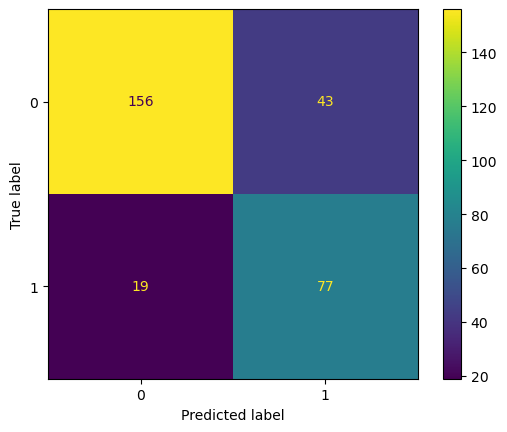

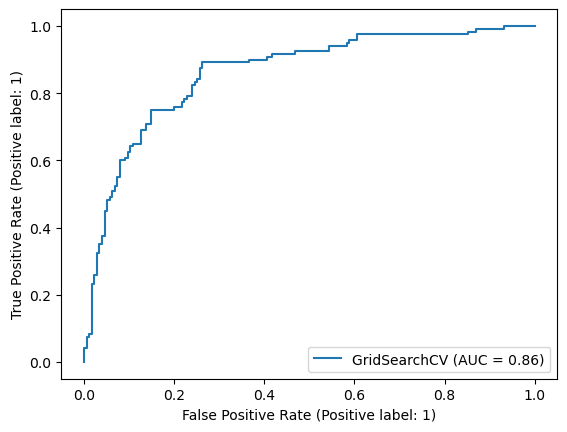

In [15]:
mach_model(param_grid , model1)

In [24]:
model2 = KNeighborsClassifier()

In [27]:
from sklearn.pipeline import Pipeline

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
operations = [('scaler' , scaler) , ('model2' , model2)]

In [37]:
pipe = Pipeline(operations)

In [38]:
n_neighbor = np.arange(1,50,1)

In [39]:
param_grid = {'model2__n_neighbors' : n_neighbor}

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ..............................model2__n_neighbors=1; total time=   0.0s
[CV] END ..............................model2__n_neighbors=1; total time=   0.0s
[CV] END ..............................model2__n_neighbors=1; total time=   0.0s
[CV] END ..............................model2__n_neighbors=1; total time=   0.0s
[CV] END ..............................model2__n_neighbors=1; total time=   0.0s
[CV] END ..............................model2__n_neighbors=2; total time=   0.0s
[CV] END ..............................model2__n_neighbors=2; total time=   0.0s
[CV] END ..............................model2__n_neighbors=2; total time=   0.0s
[CV] END ..............................model2__n_neighbors=2; total time=   0.0s
[CV] END ..............................model2__n_neighbors=2; total time=   0.0s
[CV] END ..............................model2__n_neighbors=3; total time=   0.0s
[CV] END ..............................model2__

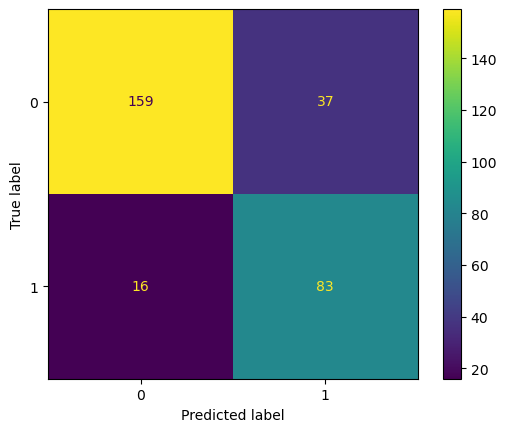

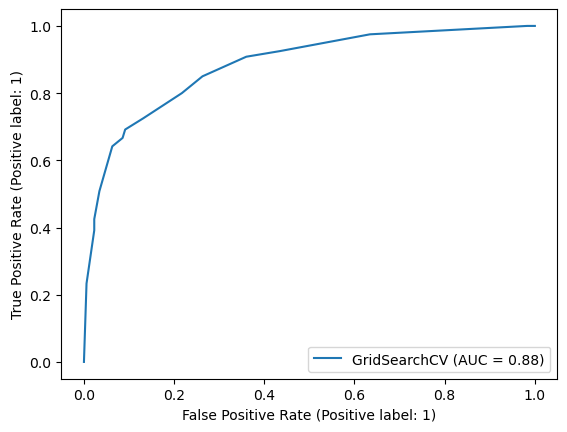

In [40]:
mach_model(param_grid , pipe)

In [43]:
model3 = SVC()

In [ ]:
param_grid = {'kernel':['linear', 'rbf'] , 'gamma' : [0.2,0.4,0.6,0.8,1]}

In [ ]:
mach_model(param_grid , model3)

In [16]:
model4 = RandomForestClassifier(bootstrap = True , oob_score = True)

In [17]:
param_grid = {'n_estimators':[100,200,300,400] , 'max_depth':[2,3,4] , 'criterion' :['gini' , 'entropy']}

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......criterion=gini, max_depth=2, n_estimators=200; total time=   0.6s
[CV] END ......criterion=gini, max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......criterion=gini, max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......criterion=gini, max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......criterion=gini, max_depth=2, n_estimators=200; total time=   0.6s
[CV] END ......criterion=gini, max_depth=2, n_estimators=300; total time=   1.0s
[CV] END ......criterion=gini, max_depth=2, n_e

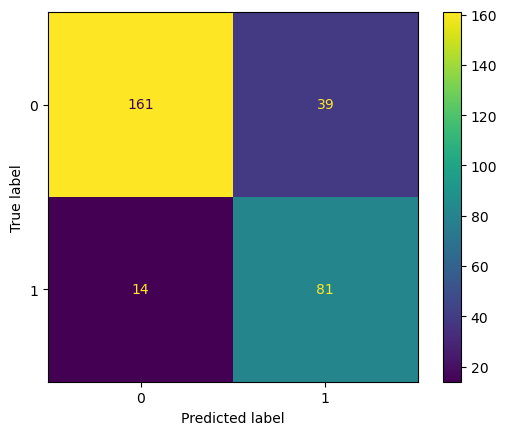

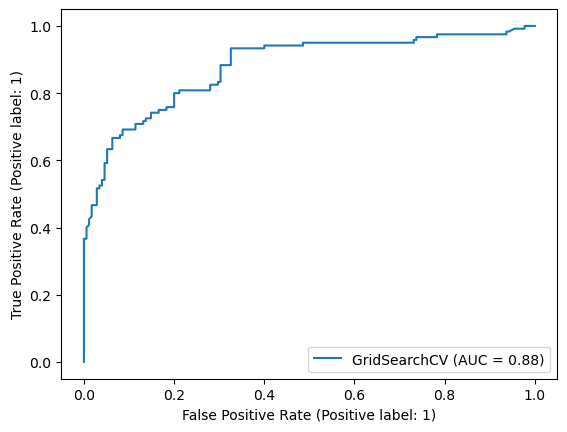

In [18]:
mach_model(param_grid , model4)

In [24]:
model5 = AdaBoostClassifier()

In [25]:
n_estimators = np.arange(1,50,1)

In [28]:
param_grid = {'n_estimators':n_estimators}

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=3; total time=   0.0s
[CV] END .....................................n

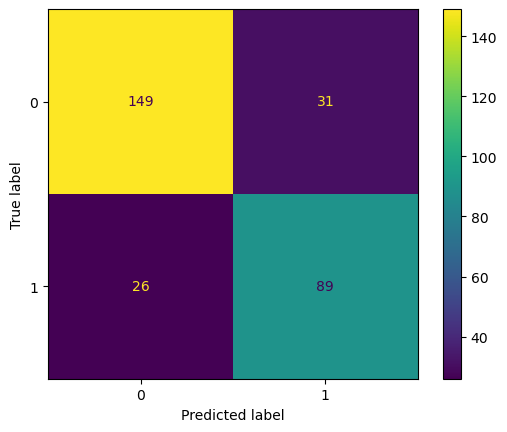

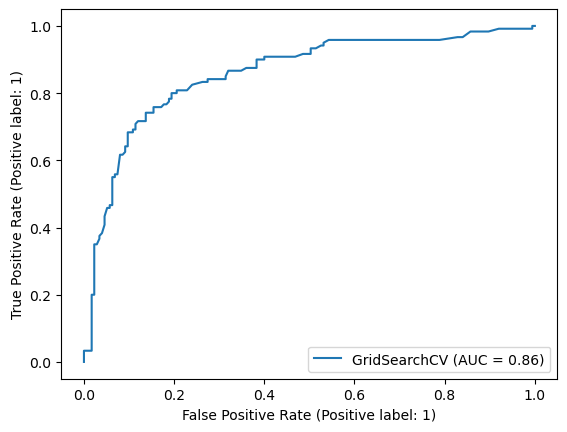

In [29]:
mach_model(param_grid , model5)

In [31]:
model6 = GradientBoostingClassifier()

In [30]:
param_grid = {'n_estimators':[100,200,300,400,500] , 'max_depth':[2,3,4]}

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=300; total time=   0.3s
[CV] END ......................max_depth=2, n_es

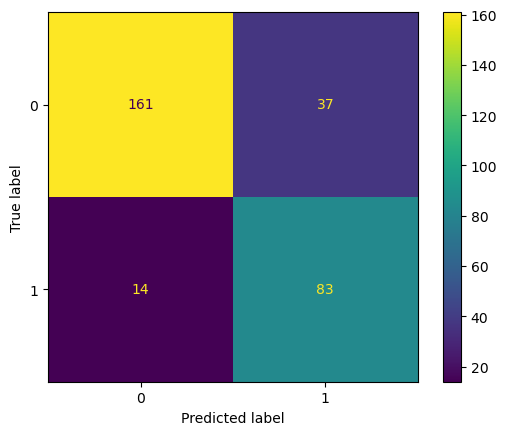

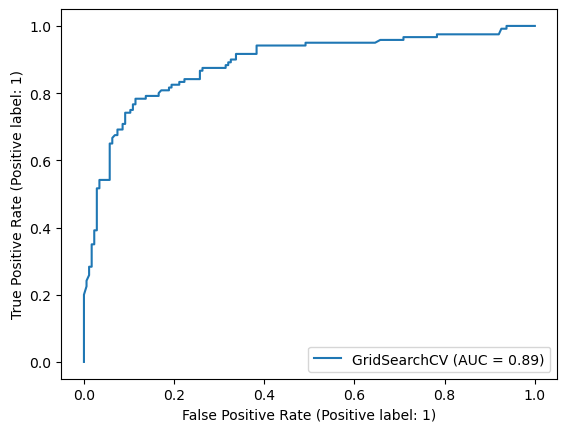

In [32]:
mach_model(param_grid,model6)

In [36]:
test_df = pd.read_csv(r'C:\Users\DEBARGHA SEN\Desktop\jose portila\kaggle competition\titanic\test.csv' , index_col = 'PassengerId')

In [37]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
test_df = test_df.drop(['Name' , 'Ticket' , 'Cabin'] , axis = 1)

In [39]:
test_df = pd.get_dummies(test_df,drop_first = True)

In [40]:
test_df.shape

(418, 8)

In [42]:
X.shape

(891, 8)

In [43]:
model_final = GradientBoostingClassifier()

In [44]:
param_grid = {'n_estimators':[100,200,300,400,500] , 'max_depth':[2,3,4]}

In [45]:
grid_model = GridSearchCV(model_final,param_grid,verbose = 2)

In [46]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=300; total time=   0.3s
[CV] END ......................max_depth=2, n_es

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [53]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [63]:
test_df['Fare'] = test_df.groupby('Pclass')['Fare'].transform(lambda value:value.fillna(value.mean()))

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [66]:
y_pred = grid_model.predict(test_df)

In [69]:
final_df = pd.DataFrame(y_pred)

In [88]:
final_df.set_index('index')

,0
index,
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0


In [89]:
final_df.to_csv(r'C:\Users\DEBARGHA SEN\Desktop\jose portila\kaggle competition\titanic\final_submission.csv')